In [8]:
## This notebook is for trying different things

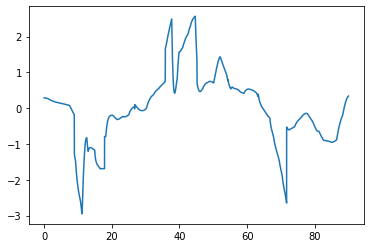

In [2]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import time 
import random 
import pymc3 as pm
import arviz as az 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# 90 seconds data 
df = pd.read_csv('sim_1.csv') 

imp_colums = ["time_step", "force", "mass", "K", "B","actual_disp", "actual_vel", "actual_acc", "G(x)"] 

for i in df.columns:
    if i not in imp_colums:
        df = df.drop([i], axis=1)

X_train = df.iloc[:6302, :8]
y_train = df.iloc[:6302, 8:]
X_test = df.iloc[6302:, :8]
y_test = df.iloc[6302:, 8:]

x_tr = scaler.fit_transform(X_train)
x_te = scaler.fit_transform(X_test) 
y_tr = scaler.fit_transform(y_train)
y_te = scaler.fit_transform(y_test) 

y = scaler.fit_transform(np.array(df['G(x)']).reshape(-1,1))
plt.plot(df['time_step'], y)



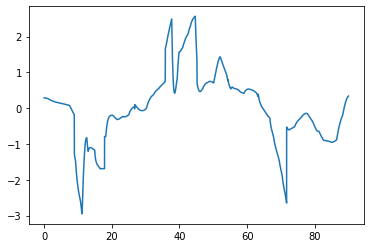

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF


rbf = ConstantKernel(1.0, (1e-1, 1e3) ) * RBF(10, (1e-3, 1e3))


gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.1) 

gpr.fit(x_tr, y_tr)
params = gpr.kernel_.get_params() 
mu_s, cov_s = gpr.predict(x_te, return_cov=True)

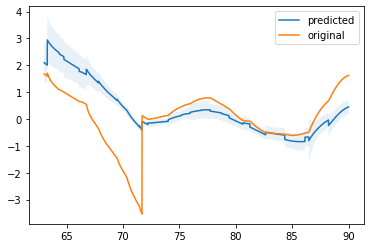

In [7]:
mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s))
plt.plot(X_test['time_step'], mu_s)
plt.plot(X_test['time_step'], y_te)
plt.fill_between(X_test['time_step'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"]) 

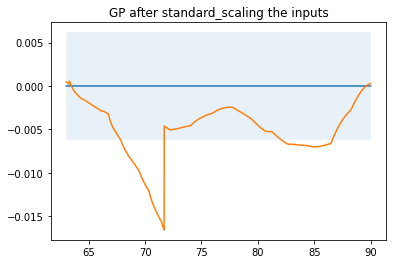

In [33]:
def plot_gp(mu, cov, X, title, Y, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    plt.plot(X, Y)
    plt.title(title)
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}') 
plot_gp(mu= mu_s, cov= cov_s, X=X_test['time_step'], Y=y_test, title= "GP after standard_scaling the inputs" )
 

In [ ]:
plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)

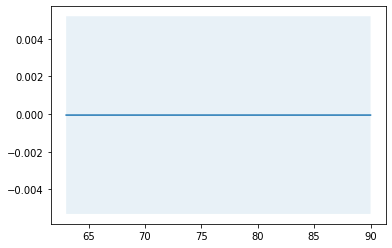

In [7]:
# without scaling 

gpr.fit(np.asarray(X_train), np.asarray(y_train))

mu, cov = gpr.predict(np.asarray(X_test), return_cov=True) 




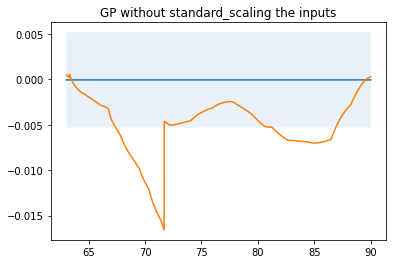

In [30]:
plot_gp(mu= mu, cov= cov, X=X_test['time_step'] ,  Y=y_test, title= "GP without standard_scaling the inputs")  

Text(0.5, 1.0, 'differences of mean')

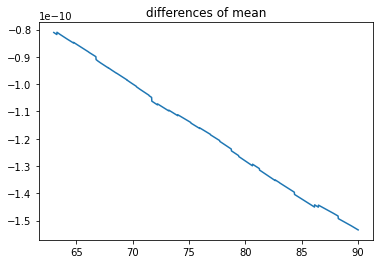

In [12]:
a = mu_s.ravel() - mu.ravel()

plt.plot(X_test['time_step'], a)
plt.title('differences of mean')

In [15]:
np.asarray(X_train['time_step']).reshape(-1,1).shape

(6302, 1)

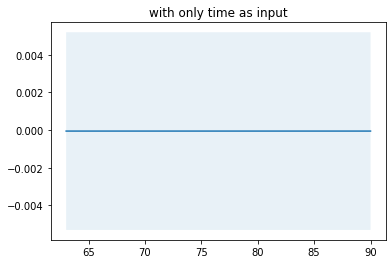

In [16]:
gpr.fit(np.asarray(X_train['time_step']).reshape(-1,1), np.asarray(y_train))

mu, cov = gpr.predict(np.asarray(X_test['time_step']).reshape(-1,1), return_cov=True) 

plot_gp(mu= mu, cov= cov, X=X_test['time_step'] ,  title= "with only time as input")  


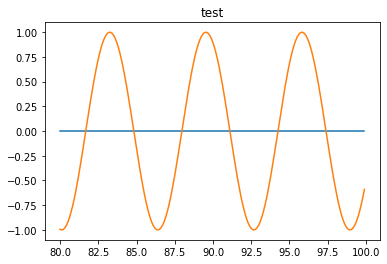

In [57]:
def plot_gp(mu, cov, X, title, Y, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    plt.plot(X, Y)
    plt.title(title)
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}') 

plot_gp(mu = m, cov = c, X=x_test, title="test", Y=y_test)

In [58]:
c = np.sqrt(np.diag(c))

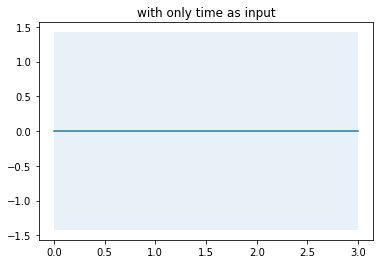

In [28]:
X = np.arange().reshape(-1, 1)
Y = np.sin(X*100) 
X_s = np.array([0, 1,2, 3]).reshape(-1,1)
gpr.fit(X, Y)
m, c = gpr.predict(X_s, return_cov=True)
plot_gp(mu= m, cov= c, X=X_s ,  title= "with only time as input") 

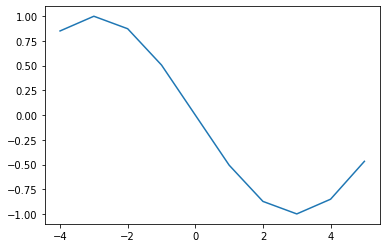

In [25]:
plt.plot(X,Y)

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared

sine = ExpSineSquared(length_scale=1, periodicity=0.5) 

gpr = GaussianProcessRegressor(kernel=sine, alpha=0.4**2) 

gpr.fit(x_tr, np.asarray(y_train))

mu_sine, cov_sine = gpr.predict(x_te, return_cov=True)

plot_gp(mu= mu_sine, cov= cov_sine, X=X_test['time_step'] ) 

LinAlgError: ("The kernel, ExpSineSquared(length_scale=1, periodicity=0.5), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '185-th leading minor of the array is not positive definite')

In [23]:
s = "A man, a plan, a canal: Panama"
s = [char for char in s]
for i in s:
    if i not in "a-zA-Z"

['A', ' ', 'm', 'a', 'n', ',', ' ', 'a', ' ', 'p', 'l', 'a', 'n', ',', ' ', 'a', ' ', 'c', 'a', 'n', 'a', 'l', ':', ' ', 'P', 'a', 'n', 'a', 'm', 'a']


In [2]:
#180 seconds data 
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import time 
import random 
import pymc3 as pm
import arviz as az 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

scaler = StandardScaler() 

df = pd.read_csv('sim_2.csv')

imp_colums = ["time_step", "force", "mass", "K", "B","actual_disp", "actual_vel", "actual_acc", "G(x)"] 

for i in df.columns:
    if i not in imp_colums:
        df = df.drop([i], axis=1)

X_train = df.iloc[:12602, :8]
y_train = df.iloc[:12602, 8:]
X_test = df.iloc[12602:, :8]
y_test = df.iloc[12602:, 8:]

x_tr = scaler.fit_transform(X_train)
x_te = scaler.fit_transform(X_test) 


In [3]:
# With Standard scaling 
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.4**2) 

gpr.fit(x_tr, np.asarray(y_train))

mu_s_180, cov_s_180 = gpr.predict(x_te, return_cov=True) 

plot_gp(mu= mu_s_180, cov= cov_s_180, X=X_test['time_step'] )  

In [ ]:
plot_gp(mu= mu_s_180, cov= cov_s_180, X=X_test['time_step'] ) 

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import time 
import random 
import pymc3 as pm
import arviz as az 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# 90 seconds data 
df = pd.read_csv('sim_1.csv') 

imp_colums = ["time_step", "force", "mass", "K", "B","actual_disp", "actual_vel", "actual_acc", "G(x)"] 

for i in df.columns:
    if i not in imp_colums:
        df = df.drop([i], axis=1)

X_train = df.iloc[:6302, :8]
y_train = df.iloc[:6302, 8:]
X_test = df.iloc[6302:, :8]
y_test = df.iloc[6302:, 8:]
from numpy.linalg import inv

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    a = np.sum(X1**2, 1).reshape(-1, 1)
    b = np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    sqdist = a + b
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def posterior(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):

    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (7)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (8)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}') 
 
 

In [3]:
mu , cov = posterior(X_s= np.asarray(X_test), X_train= np.asarray(X_train), Y_train=np.asarray(y_train))

In [9]:
samples = np.random.multivariate_normal(mu.ravel(), cov, 2)


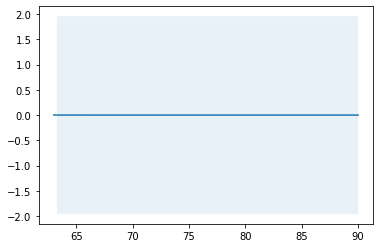

In [12]:
plot_gp(mu, cov, X = np.asarray(X_test['time_step']), samples=[])